# Quad tree 

Un quadtree es una forma de descomponer el espacio, el cual es presentado   [*A geographic information system using quadtrees*](https://www.sciencedirect.com/science/article/abs/pii/0031320384900189) por H.Samet, A. Rosenfeld, C.A. Shaffer y R.E. Webber. La idea general es dividir al espacio en cuatro partes mas pequeñas para poder generar una codificación de los elementos del espacio que sea rápida de acceder. 

Usando esta idea de forma iterativa se divide el espacio suvdividiendo cada parte en otras cuatro partes, esta estructura se interpretar como un árbol donde cada suvdivisión es un nodo hijo del nodo anterior. Una de las ventajas es que de esta forma se puede ir codificando cada suvdivision añadiendo dos digitos con valores $\{00, 01, 10,11\}$ con dos digitos de forma binaria 

In [1]:
import random
import numpy as np
import shapely
from shapely.geometry import Point, LineString
from matplotlib import pyplot as plt
import anytree
from IPython.display import IFrame
from anytree import Node, RenderTree
from anytree.exporter import DotExporter


In [2]:
out_0  = LineString([Point(0.0, 0.0), Point(1.0, 0.0), Point(1.0, 1.0) , Point(0.0, 1.0), Point(0.0, 0.0)])
out_00 = LineString([Point(0.0, 0.0), Point(0.5, 0.0), Point(0.5, 0.5) , Point(0.0, 0.5), Point(0.0, 0.0)])
out_01 = LineString([Point(0.5, 0.0), Point(1.0, 0.0), Point(1.0, 0.5) , Point(0.5, 0.5), Point(0.5, 0.0)])
out_10 = LineString([Point(0.0, 0.5), Point(0.5, 0.5), Point(0.5, 1.0) , Point(0.0, 1.0), Point(0.0, 0.5)])
out_11 = LineString([Point(0.5, 0.5), Point(1.0, 0.5), Point(1.0, 1.0) , Point(0.5, 1.0), Point(0.5, 0.5)])

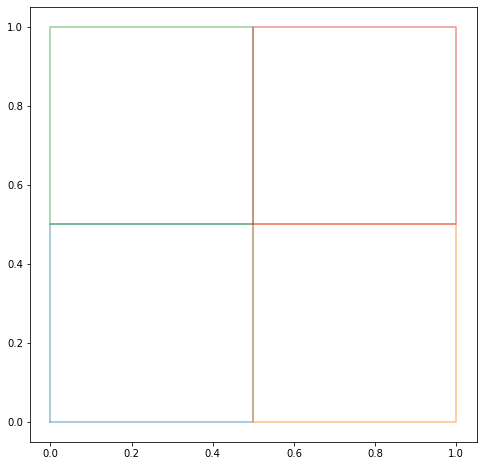

In [3]:
fig, axs=  plt.subplots( figsize=(8,8))
for i in [out_00,out_01, out_10, out_11]:
    x, y =i.xy
    axs.plot(x,y, alpha= .5)
    

In [4]:
IFrame("./quad_tree_1.pdf", width=300, height=300)

Al subdividir, la etiqueta de cada nueva región contiene a que región en el nivel superior se encuentra como se ve en el siguiente esquema. Para obtener la etiqueta de nueva región se incluye la etiqueta de la región dentro de la cual se encuentra, y se añade los digitos correspondientes $\{ 00, 01, 10, 00\}$ dependiendo si es el cuadrante inferior izquierdo, inferior derecho, superior izquierdo, superior derecho respectivamente.

In [5]:
IFrame("./quad_tree_2.pdf", width=600, height=600)

In [6]:
def get_k_bin_lev( k):
    lev=pow(4, k)
    ret_li= []
    for i in range(lev):
        ret_li.append(f'{i:0{2*k}b}')

    return ret_li

In [7]:
def point_inf(bin_string):
    
    x = []
    y = []
    for i,s in enumerate(bin_string):
        if i%2==0:
            y.append(bin_string[i])
        else:
            x.append(bin_string[i])

    p_x = int("".join(x),2)
    p_y = int("".join(y),2)
    return p_x, p_y
    

In [8]:
def quad_tree_box(k, len_space):
    
    div_space= pow(2,k)
    p_space= len_space/div_space
    coords = []
    lis_code = get_k_bin_lev(k)
    for i in lis_code:
        x_val, y_val = point_inf(i)
        coords.append( Point(x_val*p_space, y_val*p_space))
    
    cuadra =[]
    for i in coords:
        cuadra.append(shapely.geometry.Polygon([i, Point(i.x+ p_space, i.y), Point(i.x+ p_space, i.y+p_space), Point(i.x, i.y+p_space), i]))
    return cuadra , lis_code

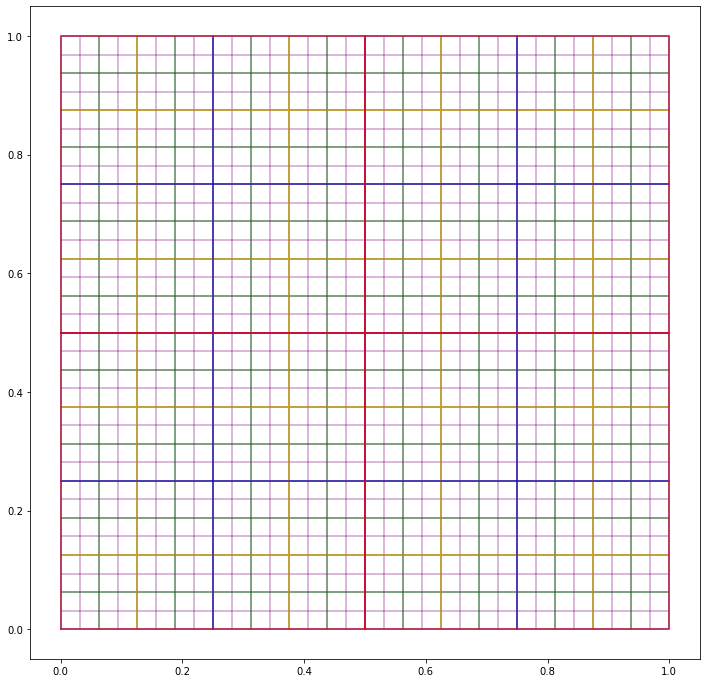

In [9]:
fig, axs=  plt.subplots( figsize=(12,12))
box_quad_1, list_quad_1  = quad_tree_box(1, 1)
box_quad_2, list_quad_2  = quad_tree_box(2, 1)
box_quad_3, list_quad_3  = quad_tree_box(3, 1)
box_quad_4, list_quad_4  = quad_tree_box(4, 1)
box_quad_5, list_quad_5  = quad_tree_box(5, 1)


for i in box_quad_5:
    x, y =i.exterior.xy
    axs.plot(x,y, color='purple',  alpha= .2)

for i in box_quad_4:
    x, y =i.exterior.xy
    axs.plot(x,y, color='green',  alpha= .3)

for i in box_quad_3:
    x, y =i.exterior.xy
    axs.plot(x,y, color='orange',  alpha= .4)

for i in box_quad_2:
    x, y =i.exterior.xy
    axs.plot(x,y, color='blue',  alpha= .5)

for i in box_quad_1:
    x, y =i.exterior.xy
    axs.plot(x,y, color='red',  alpha= .6)

In [10]:
x = np.random.random(150)
y = np.random.random(150)

In [11]:
point_random= [Point(i) for i in   list(zip(x,y))]

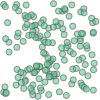

In [12]:
shapely.geometry.MultiPoint(point_random)

In [13]:

def list_contains( quan_box, points, limite):
    true_list = [False]*len(quan_box)
    for num, i in enumerate(quan_box):
        count = 0
        for j in points:
            
            if i.contains(j):
                count += 1  
            if count >= limite:
                true_list[num]= True
                break
                break
            
    return true_list 
    

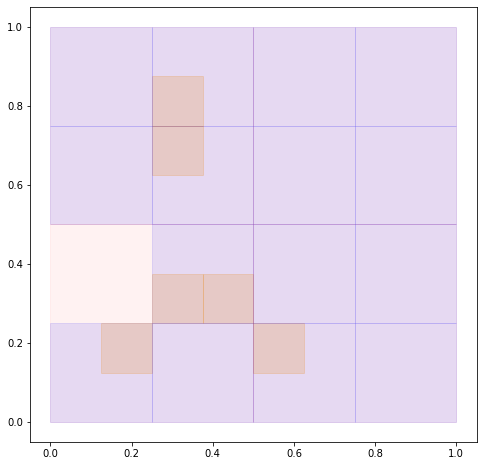

In [14]:
fig, axs=  plt.subplots( figsize=(8,8))

box_quad_5_bool = list_contains(box_quad_5, point_random, 5)
box_quad_4_bool = list_contains(box_quad_4, point_random, 5)
box_quad_3_bool = list_contains(box_quad_3, point_random, 5)
box_quad_2_bool = list_contains(box_quad_2, point_random, 5)
box_quad_1_bool = list_contains(box_quad_1, point_random, 5)

for num_i ,i in enumerate(box_quad_5):
    if box_quad_5_bool[num_i]==True:
        x, y =i.exterior.xy
        axs.fill(x,y, color='purple',  alpha= .4)

for num_i ,i in enumerate(box_quad_4):
    if box_quad_4_bool[num_i] == True:
        x, y =i.exterior.xy
        axs.fill(x,y, color='green',  alpha= .3)
    
for num_i ,i in enumerate(box_quad_3):
    if box_quad_3_bool[num_i] == True:
        x, y =i.exterior.xy
        axs.fill(x,y, color='orange',  alpha= .2)

for num_i ,i in enumerate(box_quad_2):
    if box_quad_2_bool[num_i] == True:
        x, y =i.exterior.xy
        axs.fill(x,y, color='blue',  alpha= .1)

for num_i ,i in enumerate(box_quad_1):
    if box_quad_1_bool[num_i] == True:
        x, y =i.exterior.xy
        axs.fill(x,y, color='red',  alpha= .05)



In [15]:
def list_contar ( quan_box, points):
    count_list = [0]*len(quan_box)
    for num, i in enumerate(quan_box):
        count = 0
        for j in points:
            if i.contains(j):
                count += 1  
            
        count_list[num]= count
               
            
    return count_list 

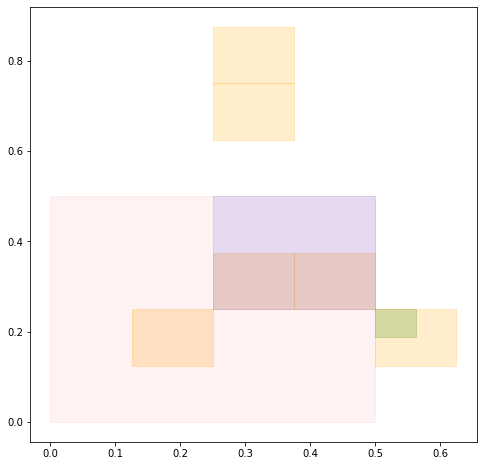

In [16]:
fig, axs=  plt.subplots( figsize=(8,8))

box_quad_5_contar = list_contar(box_quad_5, point_random)
box_quad_4_contar = list_contar(box_quad_4, point_random)
box_quad_3_contar = list_contar(box_quad_3, point_random)
box_quad_2_contar = list_contar(box_quad_2, point_random)
box_quad_1_contar = list_contar(box_quad_1, point_random)

for num_i ,i in enumerate(box_quad_5):
    if box_quad_5_contar[num_i] >= 3:
        x, y =i.exterior.xy
        axs.fill(x,y, color='purple',  alpha= .2)

for num_i ,i in enumerate(box_quad_4):
    if box_quad_4_contar[num_i] >= 4:
        x, y =i.exterior.xy
        axs.fill(x,y, color='green',  alpha= .2)
    
for num_i ,i in enumerate(box_quad_3):
    if box_quad_3_contar[num_i] >= 5:
        x, y =i.exterior.xy
        axs.fill(x,y, color='orange',  alpha= .2)

for num_i ,i in enumerate(box_quad_2):
    if box_quad_2_contar[num_i] >=15:
        x, y =i.exterior.xy
        axs.fill(x,y, color='blue',  alpha= .1)

for num_i ,i in enumerate(box_quad_1):
    if box_quad_1_contar[num_i] >= 40:
        x, y =i.exterior.xy
        axs.fill(x,y, color='red',  alpha= .05)

In [17]:
box_quad_2_contar

[11, 11, 3, 16, 10, 7, 7, 10, 7, 13, 8, 11, 8, 11, 10, 7]

In [18]:
def add_level_tree(level_previus, level_to_add, list_add_string ):
    level_added=[]
    for num_i, son in enumerate(level_to_add):
        par=[ele for ele in level_previus if ele.name==list_add_string[num_i][:-2]]
        level_added.append(anytree.Node(name=list_add_string[num_i], parent= par[0]))
    return level_added

In [33]:
Root = anytree.Node(name='')

In [34]:
Root.children

()

In [35]:
box_quad_1

In [36]:
list_quad_1

['00', '01', '10', '11']

In [37]:
level_1_nodes= add_level_tree([Root], box_quad_1, list_quad_1)


In [41]:
level_1_nodes[0].children

()

In [39]:
Root.children

(Node('//00'), Node('//01'), Node('//10'), Node('//11'))

In [42]:
level_2_nodes = add_level_tree(level_1_nodes, box_quad_2, list_quad_2)


In [43]:
level_1_nodes[0].children

(Node('//00/0000'), Node('//00/0001'), Node('//00/0010'), Node('//00/0011'))

In [44]:
Root = anytree.Node(name='')
level_1_nodes = add_level_tree([Root], box_quad_1, list_quad_1)
level_2_nodes = add_level_tree(level_1_nodes, box_quad_2, list_quad_2)
level_3_nodes = add_level_tree(level_2_nodes, box_quad_3, list_quad_3)
level_4_nodes = add_level_tree(level_3_nodes, box_quad_4, list_quad_4)
level_5_nodes = add_level_tree(level_4_nodes, box_quad_5, list_quad_5)

In [45]:
print(RenderTree(Root))

Node('/')
├── Node('//00')
│   ├── Node('//00/0000')
│   │   ├── Node('//00/0000/000000')
│   │   │   ├── Node('//00/0000/000000/00000000')
│   │   │   │   ├── Node('//00/0000/000000/00000000/0000000000')
│   │   │   │   ├── Node('//00/0000/000000/00000000/0000000001')
│   │   │   │   ├── Node('//00/0000/000000/00000000/0000000010')
│   │   │   │   └── Node('//00/0000/000000/00000000/0000000011')
│   │   │   ├── Node('//00/0000/000000/00000001')
│   │   │   │   ├── Node('//00/0000/000000/00000001/0000000100')
│   │   │   │   ├── Node('//00/0000/000000/00000001/0000000101')
│   │   │   │   ├── Node('//00/0000/000000/00000001/0000000110')
│   │   │   │   └── Node('//00/0000/000000/00000001/0000000111')
│   │   │   ├── Node('//00/0000/000000/00000010')
│   │   │   │   ├── Node('//00/0000/000000/00000010/0000001000')
│   │   │   │   ├── Node('//00/0000/000000/00000010/0000001001')
│   │   │   │   ├── Node('//00/0000/000000/00000010/0000001010')
│   │   │   │   └── Node('//00/0000/000000/00

In [50]:
DotExporter(Root, name='quadtre', maxlevel=4).to_picture('tree_quad.png')

In [46]:
from IPython.display import Image
Image(url= "./tree_quad.png")

In [47]:
def add_level_tree_fill(level_previus, level_to_add, list_add_string, level_bool ):
    level_added=[]
    for num_i, son in enumerate(level_to_add):
        if level_bool[num_i]==True:
            par=[ele for ele in level_previus if ele.name==list_add_string[num_i][:-2]]
            #print(list_add_string[num_i])
            level_added.append(anytree.Node(name=list_add_string[num_i], parent= par[0]))
        
    return level_added

In [48]:
Root_bool = anytree.Node(name='')
level_1_nodes_bool = add_level_tree_fill([Root_bool], box_quad_1, list_quad_1, box_quad_1_bool)
level_2_nodes_bool = add_level_tree_fill(level_1_nodes_bool, box_quad_2, list_quad_2, box_quad_2_bool)
level_3_nodes_bool = add_level_tree_fill(level_2_nodes_bool, box_quad_3, list_quad_3, box_quad_3_bool)
level_4_nodes_bool = add_level_tree_fill(level_3_nodes_bool, box_quad_4, list_quad_4, box_quad_4_bool)
level_5_nodes_bool = add_level_tree_fill(level_4_nodes_bool, box_quad_5, list_quad_5, box_quad_5_bool)

In [49]:
DotExporter(Root_bool, name='quadtre').to_picture('tree_quad_bool_max.png')

En esta segunda presentación de la grafica se puede observar como no todos los nodos de la gráfica tienen la misma cantidad de hijos, tomando en cuenta esto se ve por que es importante los árboles de busqueda. 

In [50]:
from IPython.display import Image
Image(url= "./tree_quad_bool_max.png")

In [73]:
class Node_Q():
    def __init__(self, x0, y0, etiqueta, ancho, altura, puntos):
        self.Point_inferior = shapely.geometry.Point(x0,y0)
        self.etiqueta = etiqueta
        self.altura  = ancho
        self.ancho   = altura
        self.polygon = shapely.geometry.Polygon([Point(x0,y0),Point(x0+ancho,y0),Point(x0+ancho,y0+altura),Point(x0,y0+altura), Point(x0,y0)]  ) 
        self.puntos  = puntos 
        self.children = []
    
    def get_ancho(self):
        return self.ancho
    
    def get_altura(self):
        return self.altura
    
    def get_puntos(self):
        return self.puntos
    
    def get_Punto_inferior(self):
        return self.Point_inferior
    
    def get_polygon(self):
        return self.polygon
    
    def get_children(self):
        return self.children
    
    def get_all_decendents(self):
        decendent= []
        for i in  self.get_children():
            decendent.append(i)
            decendent= decendent + i.get_all_decendents()
        return decendent
        
    

In [74]:
class QTree():
    def __init__(self, k, n):
        self.threshold = k
        self.Puntos = [shapely.geometry.Point(random.uniform(0, 1), random.uniform(0, 1)) for x in range(n)]
        self.root = Node_Q(x0=0, y0= 0,etiqueta='', altura = 1, ancho= 1, puntos=self.Puntos)

    def add_punto(self, x, y):
        self.Puntos.append(Point(x, y))
    
    def get_puntos(self):
        return self.Puntos
    
    def subdivide(self):
        subdividir(self.root, self.threshold)
    
    def imprime(self):
        fig, axs = plt.subplots(figsize=(12, 8))
        axs.set_title("Quadtree")
        c = encuentra_children(self.root)
        print ("Numero de nodos: " ,len(c))
        areas = set()
        for el in c:
            areas.add(el.ancho*el.altura)
        print("Area mínima de un nodo: " ,min(areas))
        for n in c:
            pol_x, pol_y = n.polygon.exterior.xy
            axs.plot(pol_x, pol_y)
        x = [point.x for point in self.Puntos]
        y = [point.y for point in self.Puntos]
        plt.plot(x, y, 'ro')
        plt.show()
        return

In [75]:
def subdividir(nodo, k):    
    if len(nodo.puntos)<=k:
        return
    altura_ = float(nodo.altura/2)
    ancho_ = float(nodo.ancho/2)

    N_00 = Node_Q(nodo.Point_inferior.x, nodo.Point_inferior.y,etiqueta =nodo.etiqueta+'00',  ancho= ancho_, altura= altura_, puntos=[])
    p = contiene(N_00, nodo.puntos)
    N_00.puntos = p
    subdividir(N_00, k)
    
    N_01 = Node_Q(nodo.Point_inferior.x+ancho_, nodo.Point_inferior.y,etiqueta =nodo.etiqueta+'01',ancho= ancho_, altura= altura_, puntos=[])
    p = contiene(N_01, nodo.puntos)
    N_01.puntos = p
    subdividir(N_01, k)
    
    N_10 = Node_Q(nodo.Point_inferior.x, nodo.Point_inferior.y+altura_,etiqueta =nodo.etiqueta+'10',ancho= ancho_, altura= altura_, puntos=[])
    p = contiene(N_10, nodo.puntos)
    N_10.puntos = p
    subdividir(N_10, k)
    
    N_11 = Node_Q(nodo.Point_inferior.x+ancho_, nodo.Point_inferior.y+altura_, etiqueta =nodo.etiqueta+'11',ancho= ancho_, altura= altura_, puntos=[])
    p = contiene(N_11, nodo.puntos)
    N_11.puntos = p
    subdividir(N_11, k)
    

    nodo.children = [N_00, N_01, N_10,N_11]
   
   
def contiene(nodo ,  puntos_c):
    contenidos =[]
    for punto in puntos_c:
        if nodo.polygon.contains(punto):
            contenidos.append(punto)
    return contenidos


def encuentra_children(nodo):
    if not nodo.children:
        return [nodo]
    else:
        children = []
        for child in nodo.children:
            children += (encuentra_children(child))
    return children

In [88]:
quad1= QTree(10, 2000)

In [89]:
child_1= encuentra_children(quad1.root)

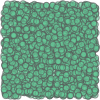

In [90]:
shapely.geometry.MultiPoint(child_1[0].puntos)

Numero de nodos:  1
Area mínima de un nodo:  1


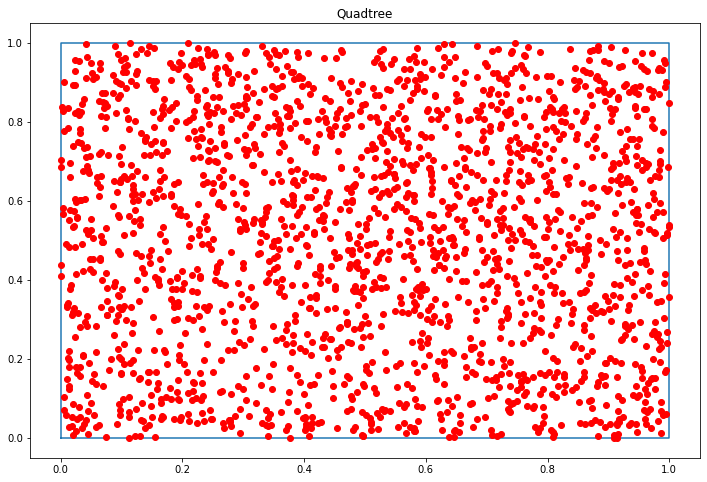

In [91]:
quad1.imprime()

In [92]:
quad1.subdivide()

Numero de nodos:  400
Area mínima de un nodo:  0.0009765625


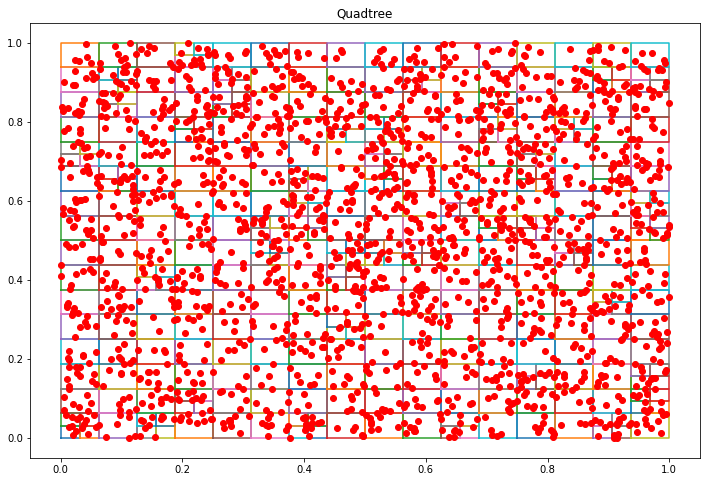

In [93]:
quad1.imprime()

In [60]:
punto_busqueda= Point(.745, .24)

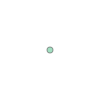

In [61]:
punto_busqueda

* Encontrar el cuadro donde se encuentra 
* Encontrar el punto más cercano

In [94]:
for i in child_1[0].children[0].children:
    print(i.etiqueta)

0000
0001
0010
0011


In [95]:
all_nodes= child_1[0].get_all_decendents()
len(all_nodes)

532

In [96]:
lo_contiene=[]
for node in all_nodes:
    if node.polygon.contains(punto_busqueda):
        lo_contiene.append(node)

In [117]:
lo_contiene

In [118]:

for i in lo_contiene:
    print(i.etiqueta)
    if i.etiqueta=='01001111':
        el_bueno =i

01
0100
010011
01001111


In [106]:
el_bueno.puntos

In [ ]:
el_bueno.puntos

In [108]:
import math
dis= []  
for punto_dentro in el_bueno.puntos:
     dis.append(math.sqrt(pow(punto_busqueda.x-punto_dentro.x,2)+pow(punto_busqueda.y-punto_dentro.y,2) ))
indice_el_bueno=dis.index(min(dis))

mas_cercano=el_bueno.puntos[indice_el_bueno]
print(mas_cercano)

POINT (0.7402869940955967 0.2394608536589596)


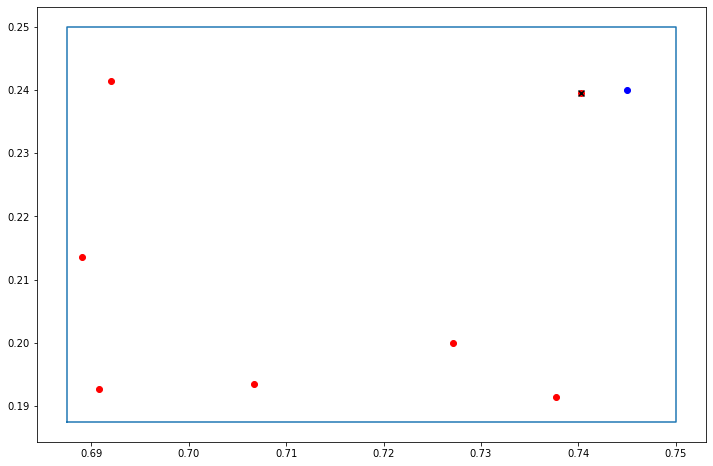

In [116]:
fig, axs = plt.subplots(figsize=(12, 8))
x_c ,y_c =el_bueno.polygon.exterior.xy

axs.plot(x_c,y_c)
for punto in  el_bueno.puntos:
    axs.scatter(punto.x, punto.y, color='red') 
axs.scatter(punto_busqueda.x, punto_busqueda.y, color='blue') 
axs.scatter(mas_cercano.x, mas_cercano.y, color='black', marker='x') 